In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

Import csv data into pandas dataframe

In [2]:
df = pd.read_csv('./student.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Dataset information


- gender: sex of student (male/female)
- race/ethnicity: ethnicity of student (Group A,B,C,D,E)
- parental level of education: parents' final education (bachelor's degree,some collefe,master's degree,assocaition.s degree,high school)
- lunch: having lunch before test(standard or free/reduced)
- test preparation course: complete or not complete before test
 math score
- reading score
- writing score

## Checks to run on data

- missing values
- duplicate values
- data types
- number of unique vlaues of each column
- statistics of dataset
- various categories present in the different categorical column 


## missing values 

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- NO MISSING VALUES PRESENT

## Check duplicates

In [6]:
df.duplicated().sum()

0

## Check datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Check number of unique occurences in a column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- ALL MEANS ARE CLOSE TO EACH OTHER BETWEEN 66 AND 68.05
- ALL STANDARD DEVIATIONS ARE ALSO CLOSE - BETWEEN 14.6 AND 15.19
- WHILE THERE IS MINIMUM SOCRE 0 FOR MATH ,FOR WRITING MINIMUM IS MUCH HIGHER = 10 AND FOR READING MYET HIGHER = 17


## Exploring Data

In [10]:
print("categories in 'gender' variable :  ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level od education' variable: ",end =" ")
print(df['parental_level_of_education'].unique())

print("categories is 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preperation course variable: ",end =" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable :   ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level od education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories is 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preperation course variable:  ['none' 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print('we have {} numeric features : {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for "Total score" and "Average"

In [12]:
# sum of scores will be total score and avg it to find average feature

df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average']=df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'number of student with full marks in maths: {math_full}')
print(f'number of student with full marks in reading: {reading_full}')
print(f'number of student with full marks in writing: {writing_full}')

number of student with full marks in maths: 7
number of student with full marks in reading: 17
number of student with full marks in writing: 14


In [14]:
reading_less_20 = df[df['reading_score']<20]['average'].count()
writing_less_20 = df[df['writing_score']<20]['average'].count()
math_less_20 = df[df['math_score']<20]['average'].count()

print(f'number of student with less than 20 marks in reading : {reading_less_20}')
print(f'number of student with less than 20 marks in writing : {writing_less_20}')
print(f'number of student with less than 20 marks in math : {math_less_20}')

number of student with less than 20 marks in reading : 1
number of student with less than 20 marks in writing : 3
number of student with less than 20 marks in math : 4


## INSIGHT 
- STUDENTS PERFORMED WORST IN MATHS
- BEST PERFORMENCE IS IN READING


## Visualize average score distribution to make some conclusion

   ### Histogram
   ### (KDE)

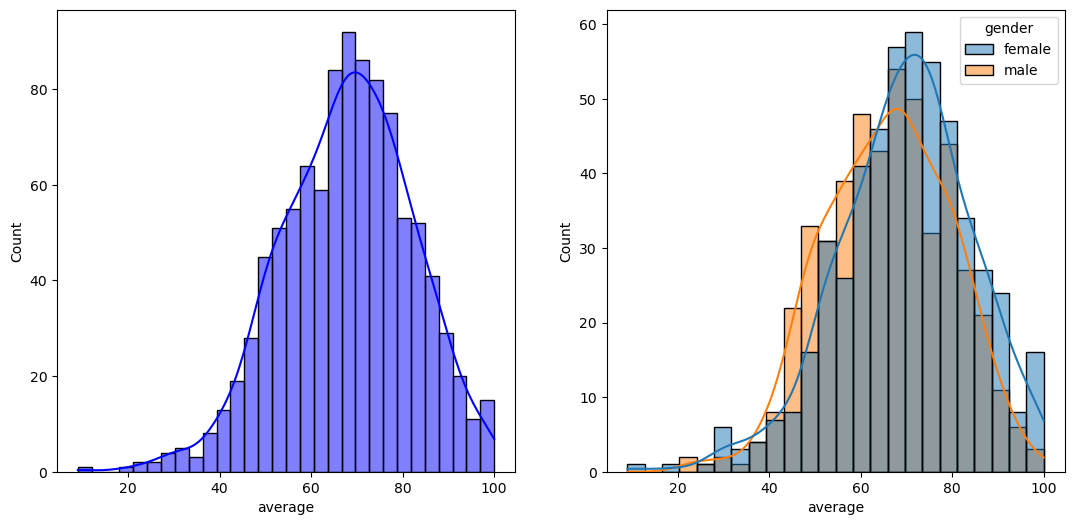

In [15]:
fig, axs = plt.subplots(1,2,figsize=(13,6))
plt.subplot(121) # 121 means 1 row 2 columns and in left most plot = 1 
sns.histplot(data = df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)  # 121 means 1 row 2 columns and in right most plot = 2
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

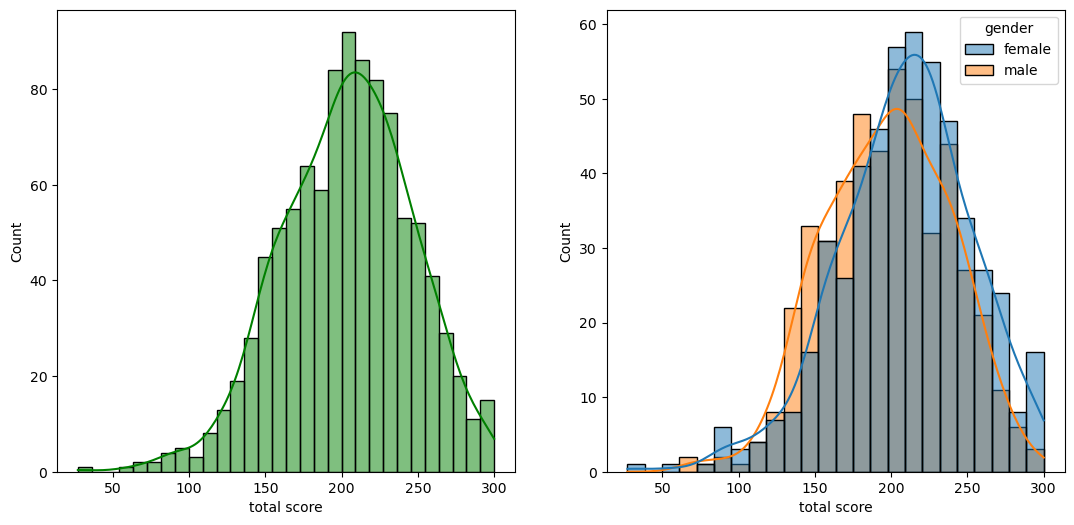

In [16]:
fig, axs= plt.subplots(1,2,figsize=(13,6))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde = True,hue='gender')
plt.show

## INSIGHT
- FEMALE STUDENTS TEND TO PERFORM WELL THEN MALE STUDENTS

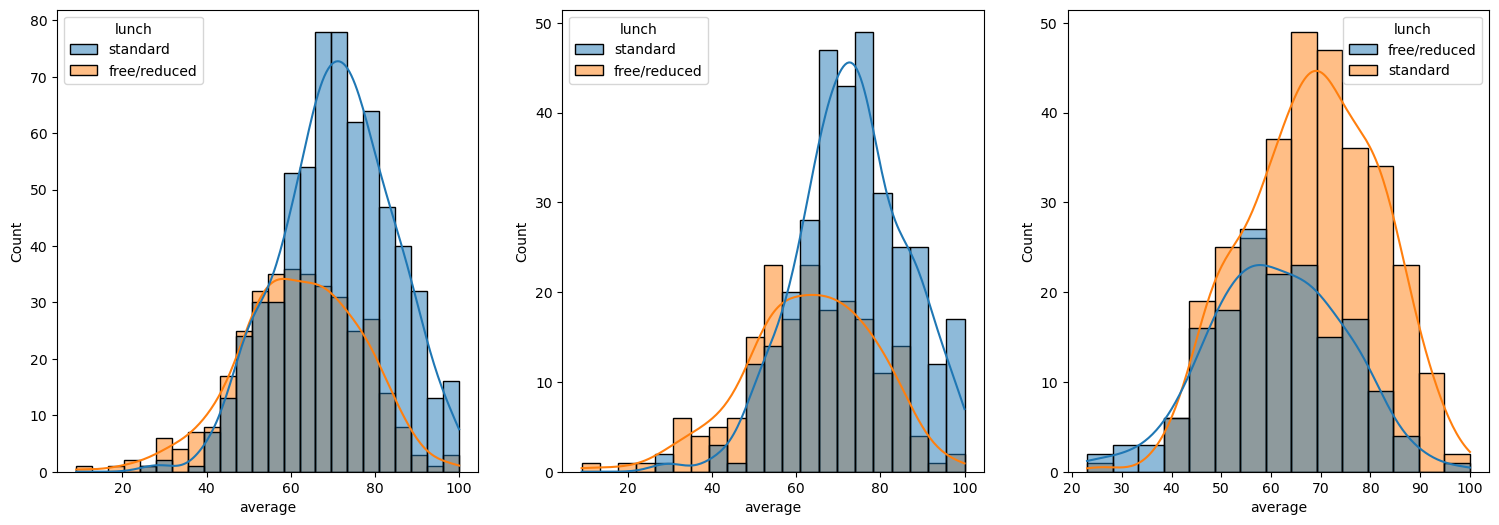

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


- STANDARD LUNCH HELPS PERFORMS WELL IN EXAMS, BE IT A MALE OR A FEMALE

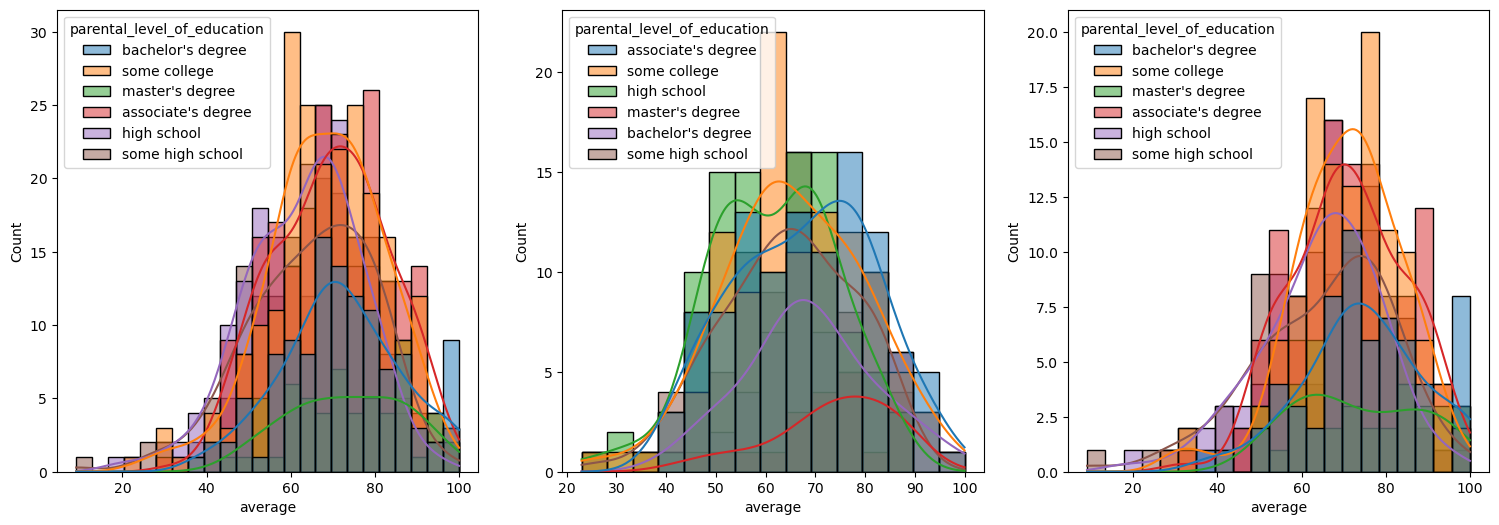

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

## INSIGHT
- IN GENERAL PARENT'S EDUCATION DON'T HELP STUDENT PERFORM WELL IN EXAM.
- 2ND PLOT SHOWS THAT PARENT'S WHOSE EDUCATION IS OF ASSCOCIATE'S DEGREE OR MASTER'S DEGREE THEIR MALE CHILD TEND TO PERFORM WELL IN EXAM. 
- 3RD PLOT WE CAN SEE THERE IS NO EFFECT OF PARENT'S EDUCATION ON FEMALE STUDENTS.

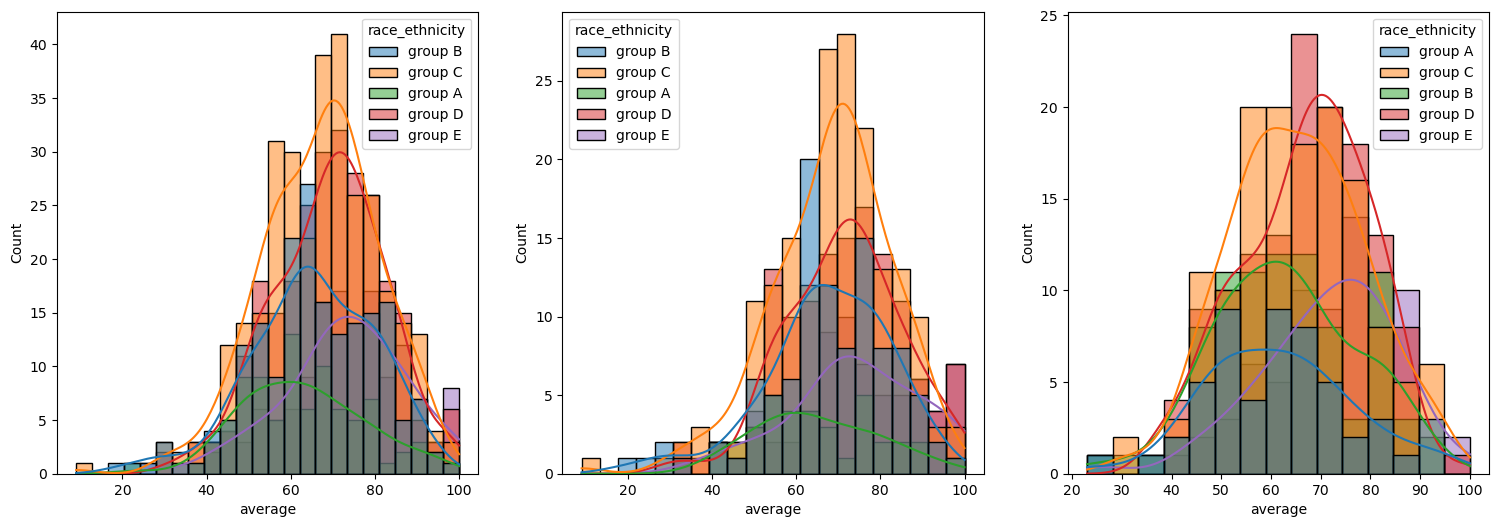

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
ax = sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,4,2)
ax = sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,4,3)
ax = sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='race_ethnicity')
plt.show()


## INSIGHT
- STUDENTS OF GROUP A AND GROUP B TENDS TO PERFORM POORLY IN EXAM.
- STUDENT OF GROUP A AND GROUP B TEND TO PERFORM POORLY IN EXAM IRRESPECTIVE WHETHER THEY ARE MALE OR FEMALE

### Maximum score of students in all three subjects

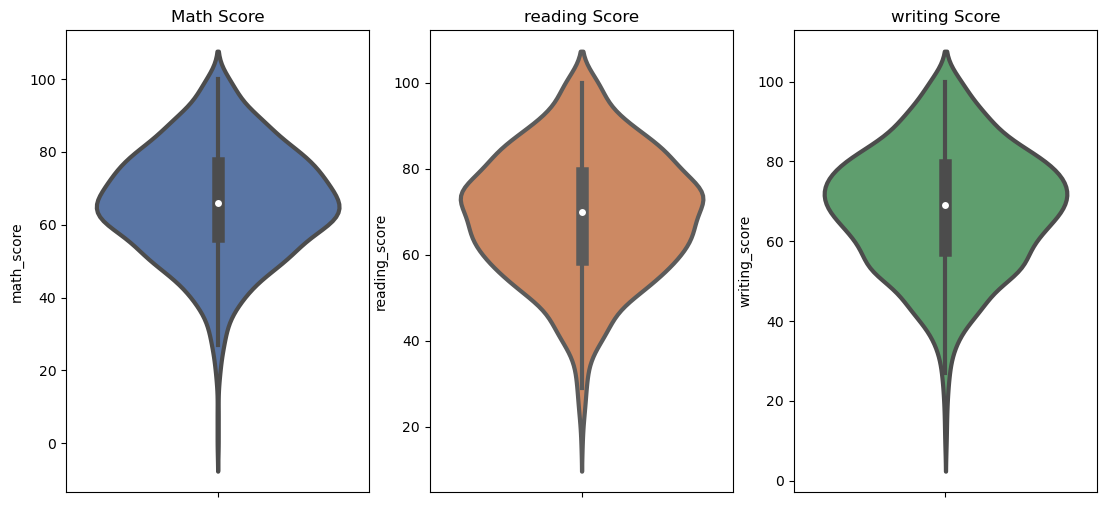

In [20]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='#4c72b0',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading Score')
sns.violinplot(y = 'reading_score',data=df,color='#dd8452',linewidth= 3)
plt.subplot(1,4,3)
plt.title('writing Score')
sns.violinplot(y='writing_score',data=df,color='#55a868',linewidth= 3)
plt.show()


- FROM THE ABOVE THREE PLOTS ITS CLEARLY VISIBLE THAT MOST OF THE STUDENTS SCORE IN BETWEEN 60-80 IN MATHS WHEREAS IN READING AND WRITING MOST OF THEM SCORE FROM 50-80

## Multivariate analysis using pieplot

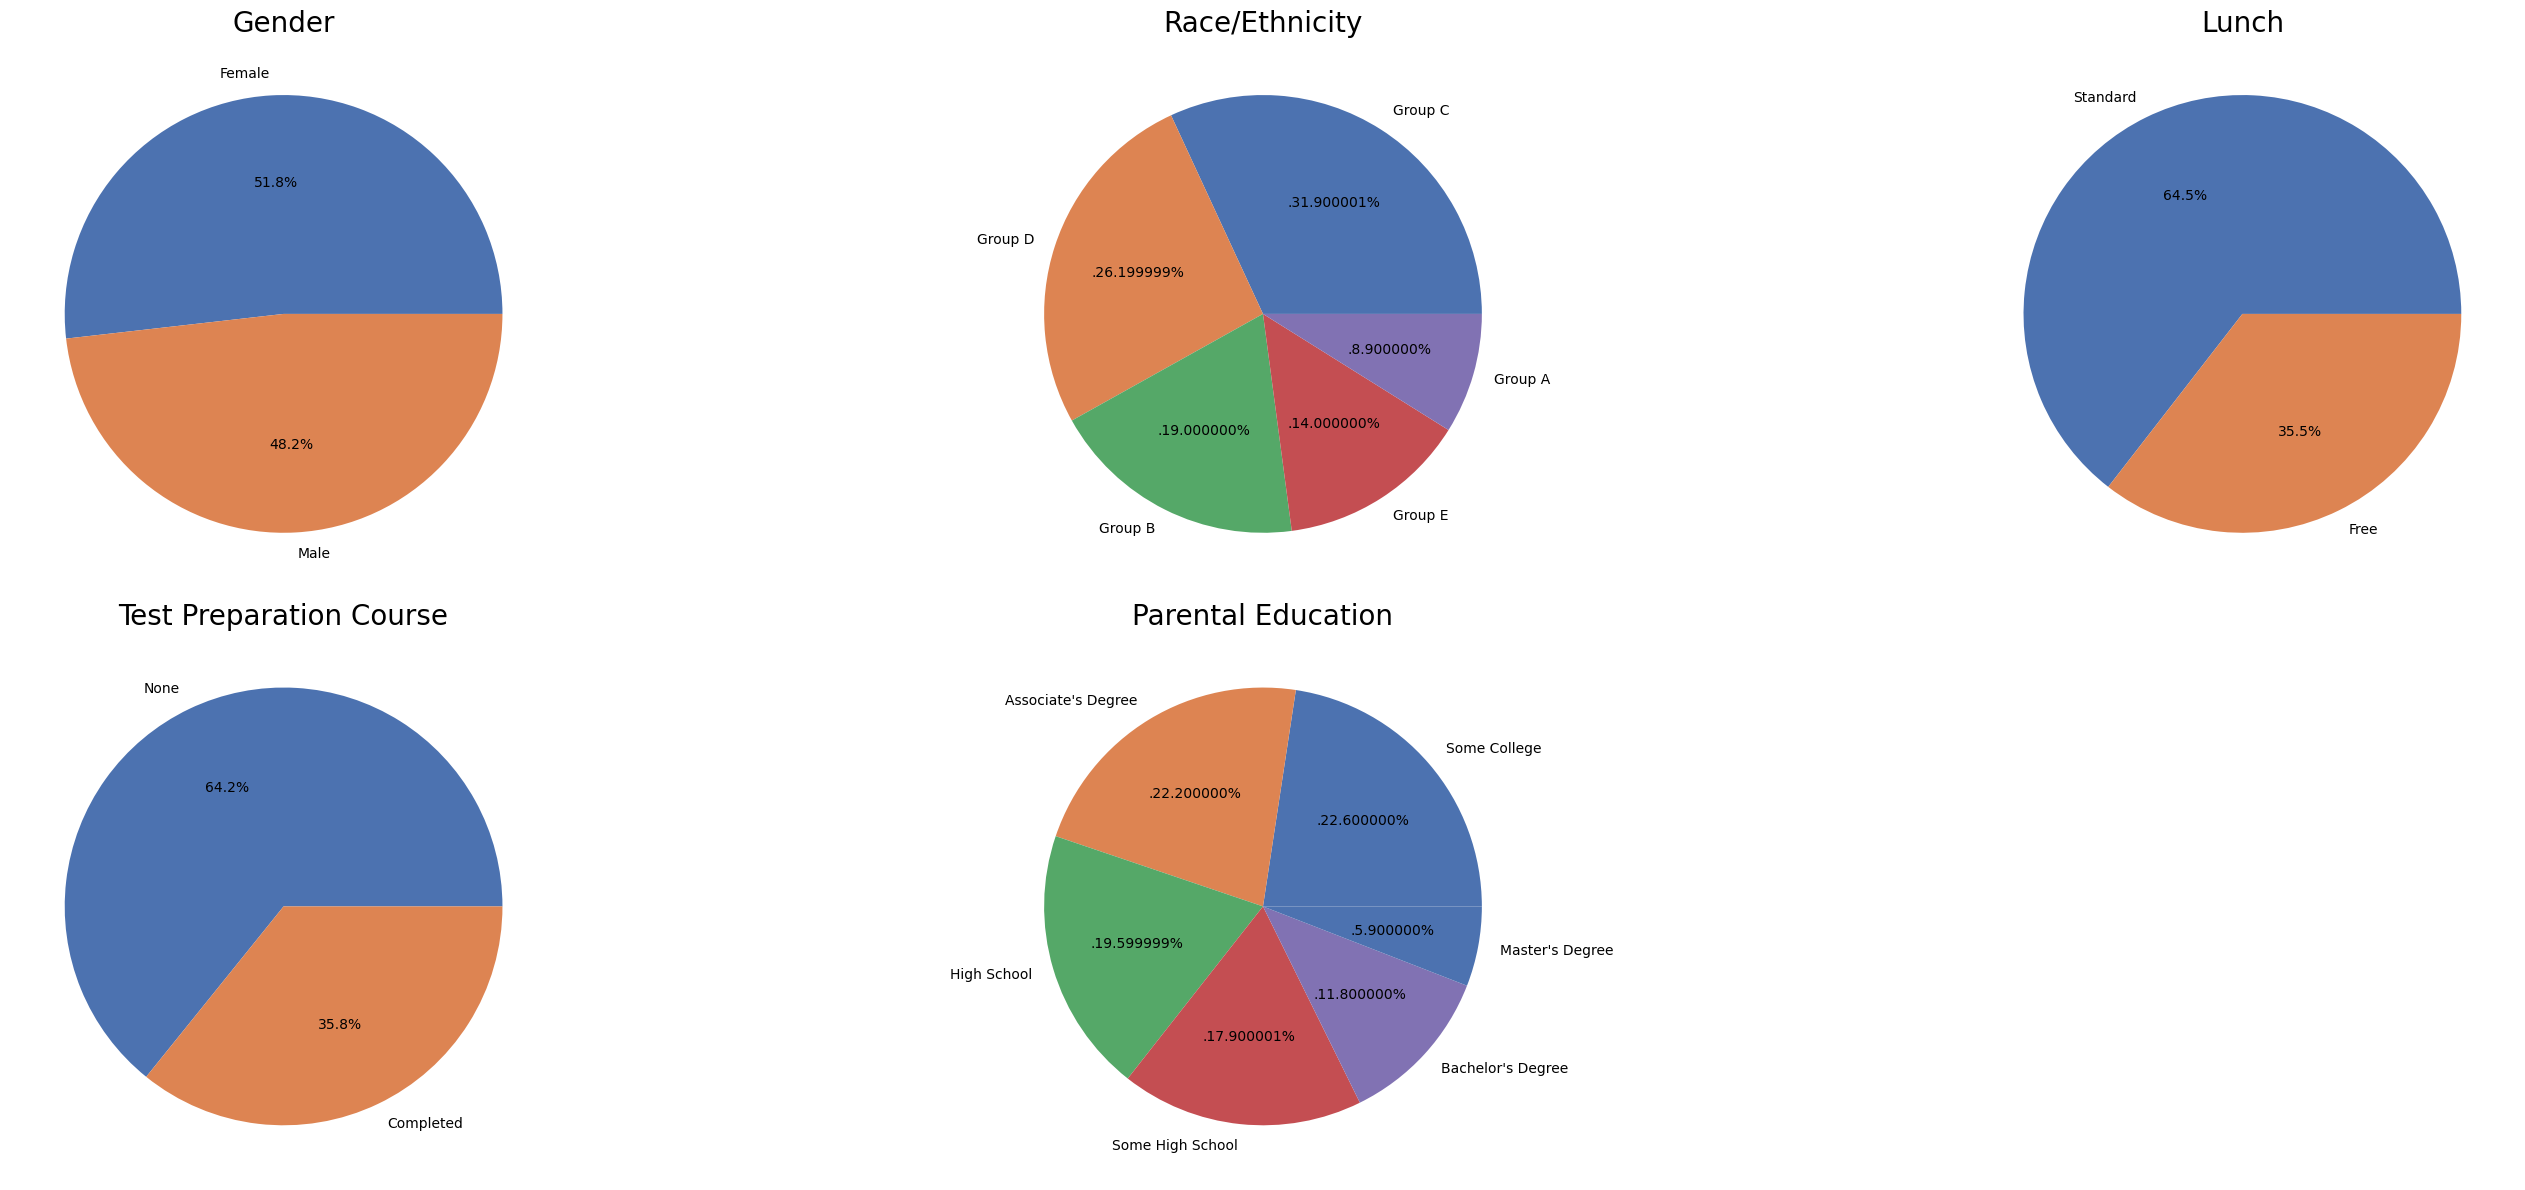

In [21]:
plt.figure(figsize=(30,12))

plt.subplot(2,3,1)
size=df['gender'].value_counts()
labels = 'Female','Male'
color=['#4c72b0','#dd8452']

plt.pie(size,colors=color,labels =labels,autopct='%1.1f%%')
plt.title('Gender',fontsize=20)
plt.axis('off') # forces plot to keep x and y-axis inline

plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color=['#4c72b0','#dd8452','#55a868', '#c44e52', '#8172b3']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3,3)
size = df['lunch'].value_counts()
labels='Standard','Free'
color=['#4c72b0','#dd8452']


plt.pie(size,labels=labels,colors=color,autopct='%1.1f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 4)
size=df['test_preparation_course'].value_counts()
labels ='None','Completed'
color=['#4c72b0','#dd8452']


plt.pie(size,colors=color,autopct='%1.1f%%',labels=labels)
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['#4c72b0','#dd8452','#55a868', '#c44e52', '#8172b3']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## INSIGHT
- NUMBER OF MALE AND FEMALE STUDENT IS ALMOST EQUAL
- NUMBER OF STUDENTS ARE GREATEST IN GROUP C
- NUMEBR OF STUDENTS WHO HAVE STANDARD LUCH ARE GREATER
- NUMBER OF STUDENTS WHO HAVE NOT ENROLLED IN ANY TEST PREPARATION COURSE IS GREATER
- NUMBER OF STUDENTS WHOSE PARENTAL EDUCATION IS "SOME COLLEGE" IS GREATE FOLLOWED CLOSELY BY "ASSOCIATE'S DEGREE"

## Feature Wise Visualization

### Gender Column

- How is distribution of gender?
- Is greater has any impact on impact on student's performance ?

#### Univariate  Analysis ( How  is distribution of Gender ? )

In [22]:
# for container in ax[0].containers:
#     print(ax[0].bar_label(container,color='black',size=20))

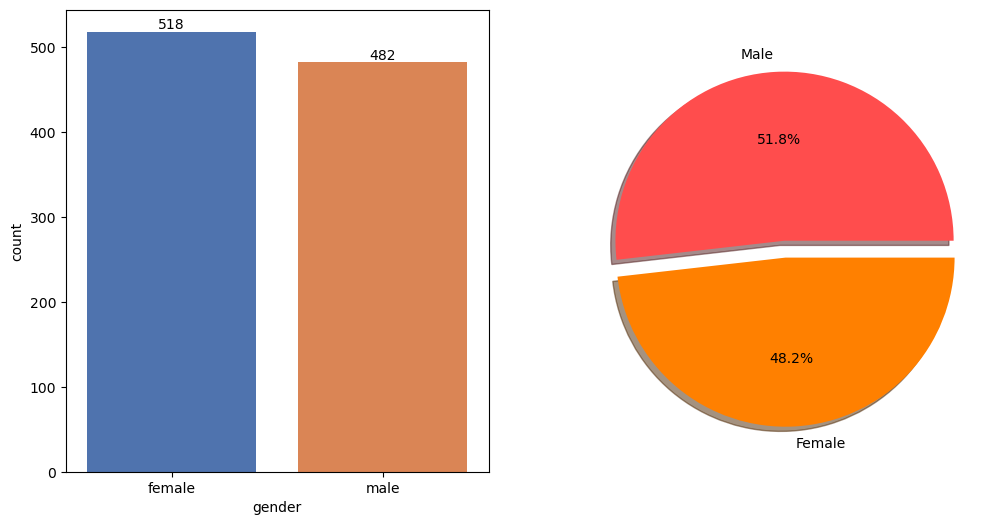

In [23]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['gender'],data=df,palette ='deep',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## INSIGHT
- GENDER HAS BALANCCCED DATA WITH DEMALE STUDENTS ARE 518(48%) AND MALE STUDENTS ARE 482(52%)

## Bivariate Analysis (Is gender has any impact on student's performance)

In [25]:
gender_group = df.groupby('gender').mean()
gender_group


# print(gender_group['average'][1])
# print(gender_group['math_score'][0])


,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


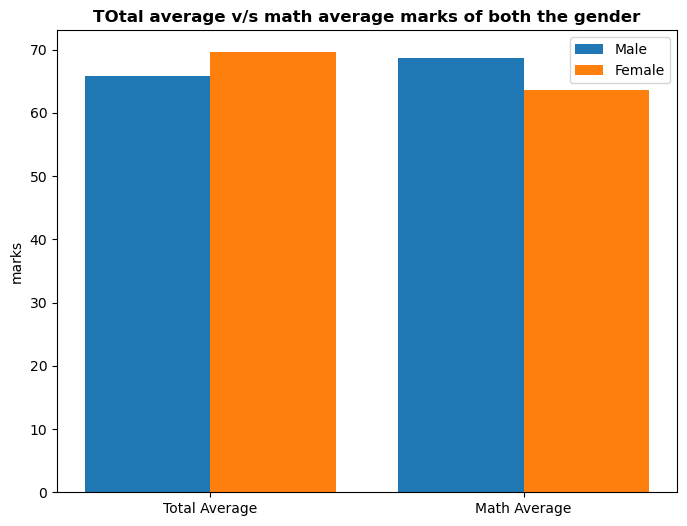

In [26]:
plt.figure(figsize=(8, 6))

X = ['Total Average','Math Average']
female_score = [gender_group['average'][0],gender_group['math_score'][0]]
male_score = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis+0.2, female_score, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("marks")
plt.title("TOtal average v/s math average marks of both the gender", fontweight='bold')
plt.legend()
plt.show()





## INSIGHT
- ON AVERAGE FEMALE HAVE A BETTER OVERALL SCORE THAN MEN
- WHERAS MALE HAVE SCORED HIGHER IN MATHS

## Race/Ethnicity Column

- How is group wiae distribution ?
- is Race/Ethnicity has any impact on student/s performance ?

### Univariate Analysis ( How is group wise distribution ? )

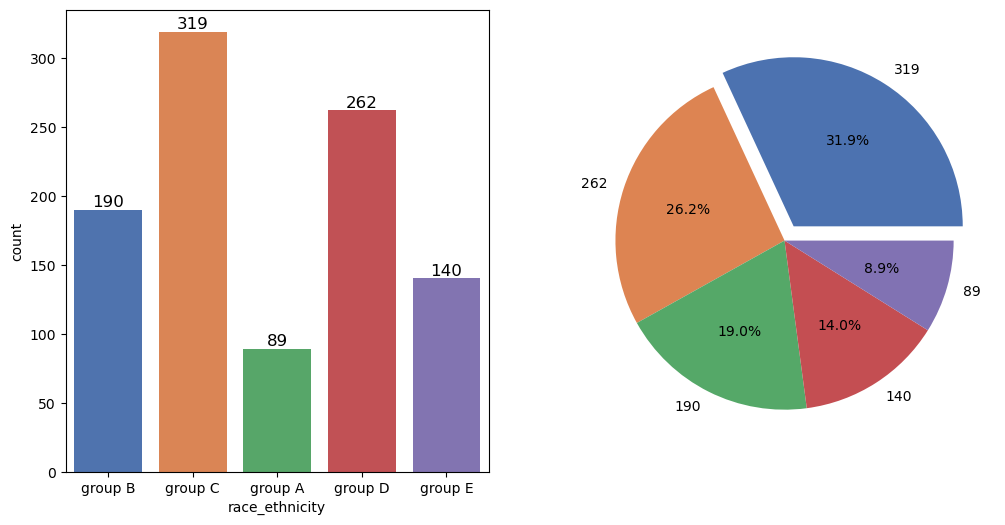

In [27]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'deep',ax =ax[0],saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size = 12)

color=['#4c72b0','#dd8452','#55a868', '#c44e52', '#8172b3']
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts(), colors = color,explode=(0.1,0,0,0,0),autopct='%1.1f%%')
plt.show()


## INSIGHT
- MOST OF THE STUDENT BELONGING FROM GROUP C / GROUP D
- LOWEST NUMBER OF STUDENTS BELONG TO GROUP A

### Bivariate Analysis ( Is Race/Ethnicity has any impact on student/s performance ? )

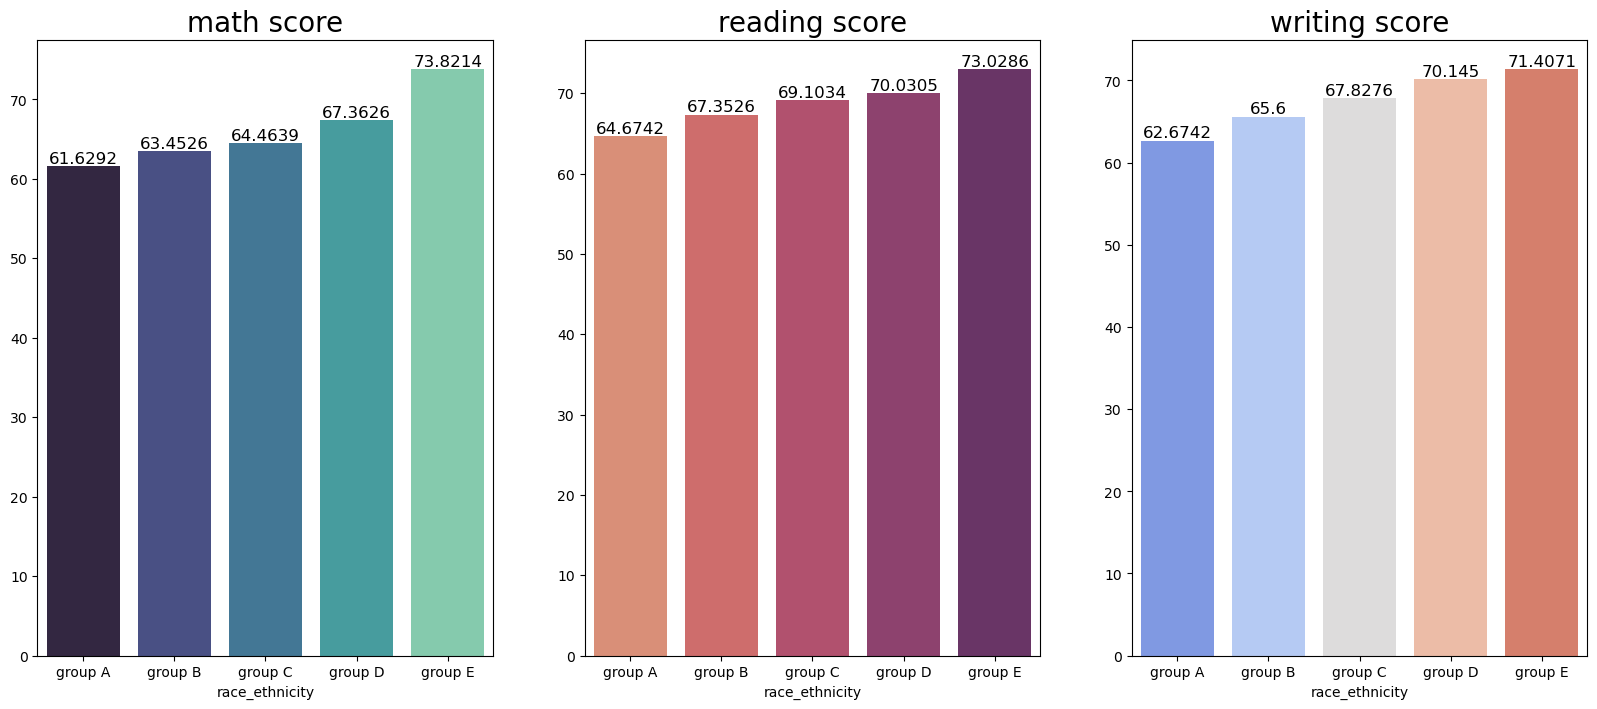

In [28]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette = 'mako' ,ax =ax[0])
ax[0].set_title('math score',color='black',size =20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)


sns.barplot(x=group_data2['reading_score'].mean().index,y =group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading score',color='black',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)


sns.barplot(x=group_data2['writing_score'].mean().index,y =group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='black',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=12)


- GROUP E STUDENTS HAV SCORED THE HIGHEST MARKS
- GROUP A STUDENTS HAVE SCORED THE LOWEST MARKS
- STUDENTS FROM A LOWER SOCIOECONOMIX STATUS HAVE LOWET AVG IN ALL COURSE SUBJECT

## Parental level of education column

##### - what is educational background of student's parent ?
##### - Do parental education has any impact on student's performence ?

## Univariate Analysis ( What is educational bakgroun of studnet's parent ? )

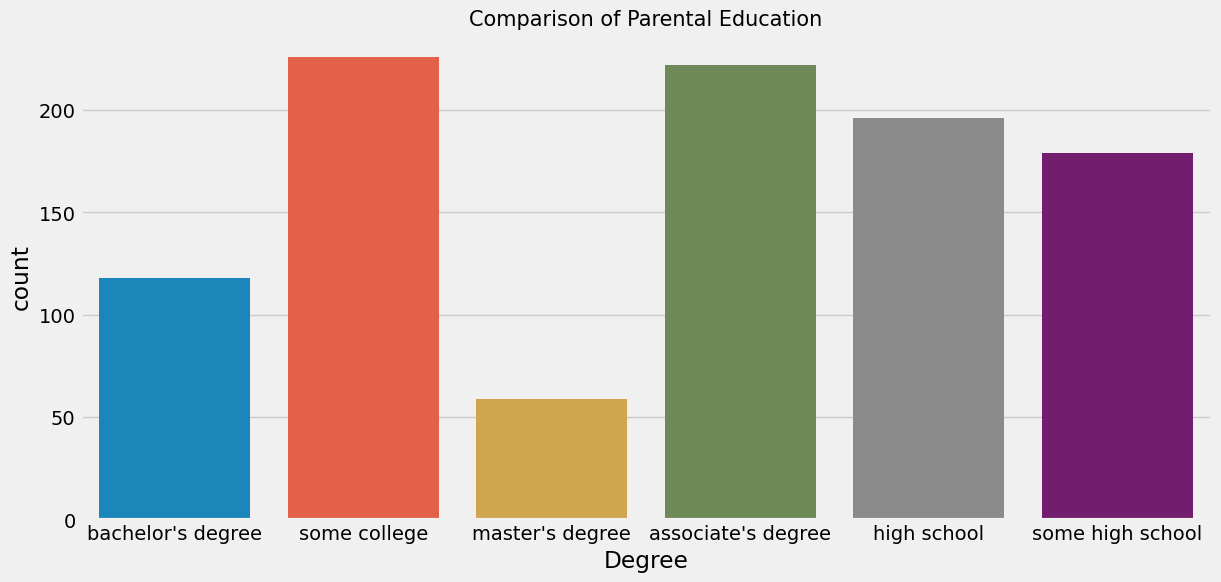

In [29]:
plt.rcParams['figure.figsize'] = (13, 6)
plt.style.use('fivethirtyeight')
sns.countplot(x= df['parental_level_of_education'])
plt.title('Comparison of Parental Education', fontweight = 20, fontsize = 15)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


## INSIGHT
- LARGEST NUMBER OF PARENTS COME FROM SOME COLLEGE

## Bivariate analysis ( Is parental education has any impact on student's performence)

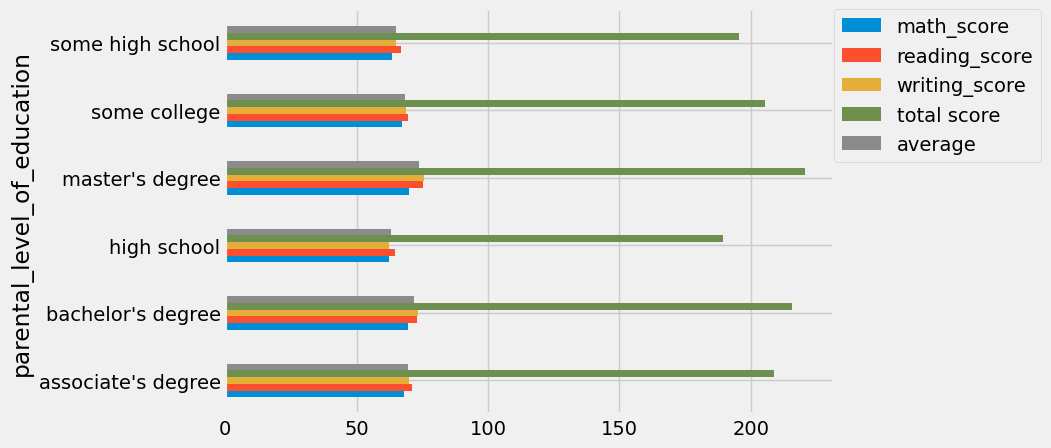

In [30]:
df.groupby('parental_level_of_education').mean().plot(kind='barh',figsize=(7,5))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

plt.show()

## INSIGHT
- SCORES OF STUDENTS WHOSE PARENTS POSSESS MASTER'S OR BACHELOR'S LEVEL DEGREE ARE HIGHER THEN OTHER STUDNETS

## Lunch column 

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### Univariate Analysis ( Which type of lunch is most common amoung students ? )

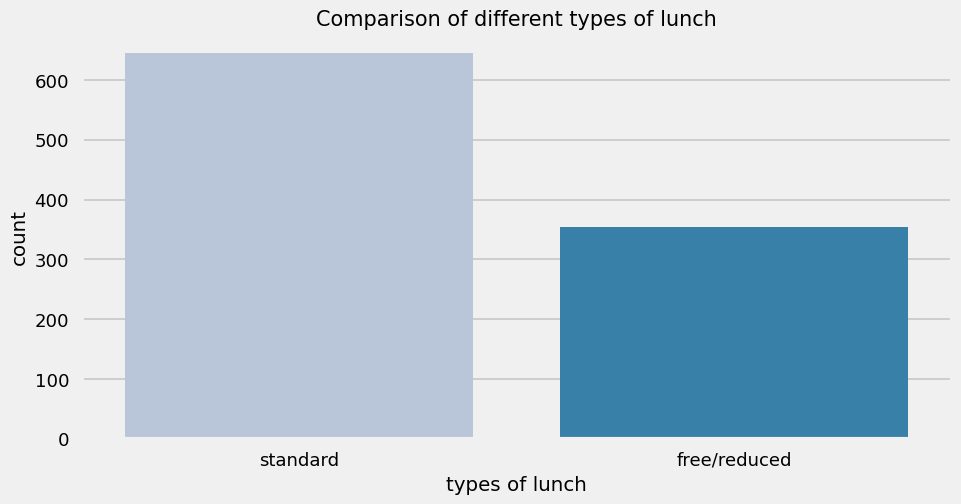

In [31]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-talk')
sns.countplot(data = df ,x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 1, fontsize = 15)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()  

## INSIGHT
- NUMBER OF STUDENTS BEING SERVED STANDARD LUNCH IN GREATER THEN FREE/REDUCED LUNCH

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

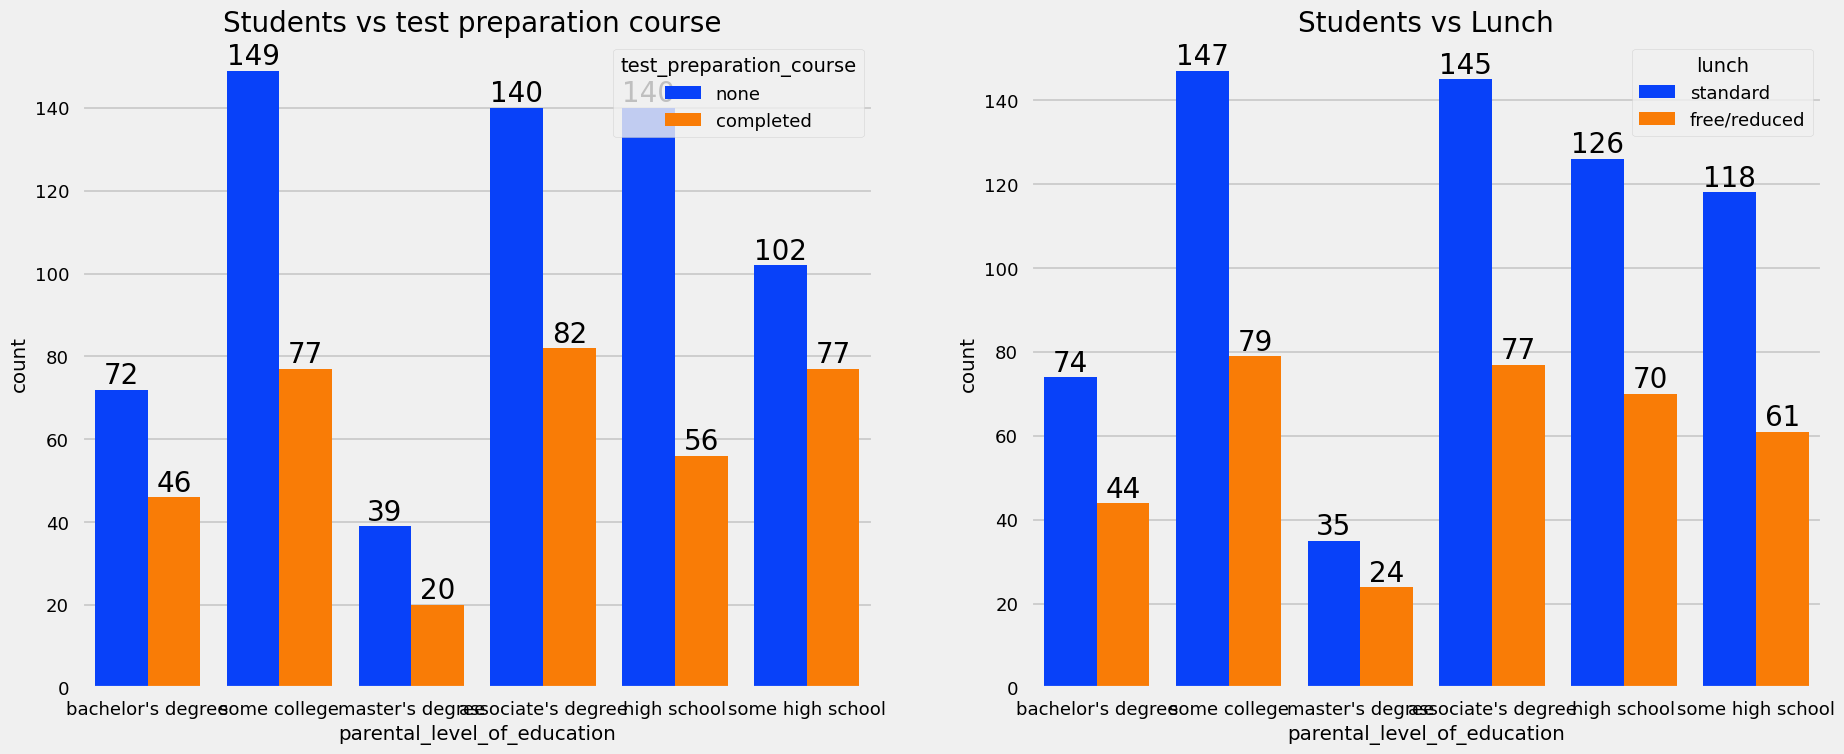

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs Lunch',color='black',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

## INSIGHT
- STUDENTS WHO GET STANDARD LUNCH TEND TO PERFORM BETTER THAN STUDENTS WHO GOT FREE/REDUCED LUNCH

### TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

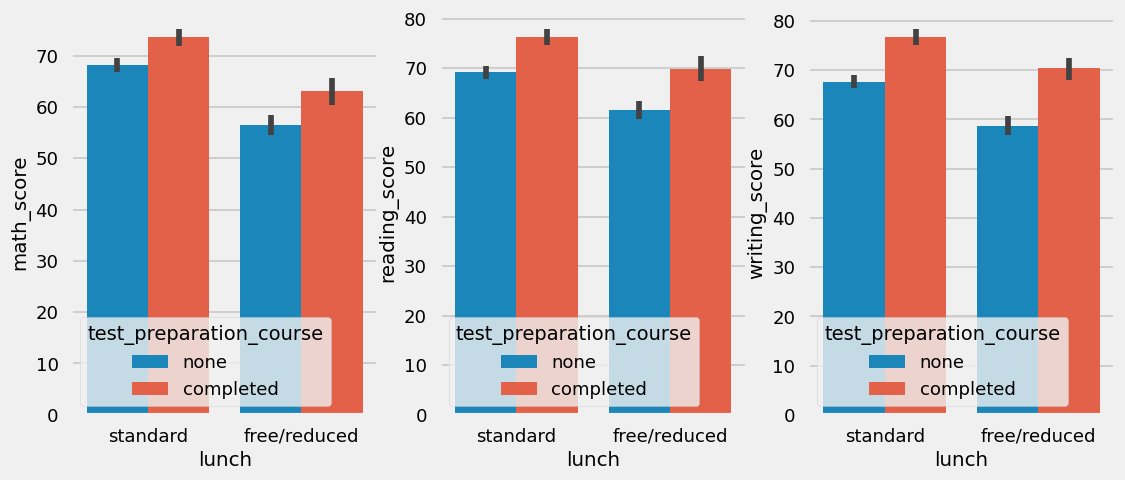

In [33]:
f,ax = plt.subplots(1,3,figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## INSIGHT
- STUDENTS WHO HAVE COMPLETED THE TEST PREPARATION COURSE HAVE SCORES HIGHER IN ALL THREE CATEGORIES THAN THOSE WHO HAVEN'T TAKEN THE COURSE

## CHECKING OUTLIERS

C:\Users\FORAM\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FORAM\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FORAM\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FORAM\anaconda\lib\site-p

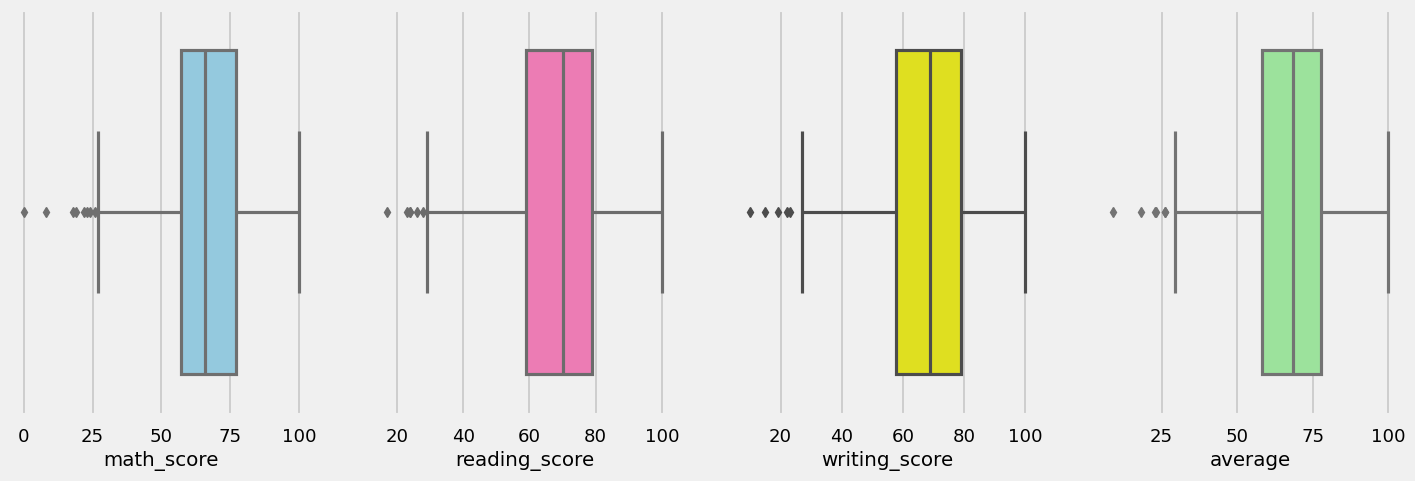

In [34]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## MUTIVARIATE ANALYSIS USING PAIRPLOT

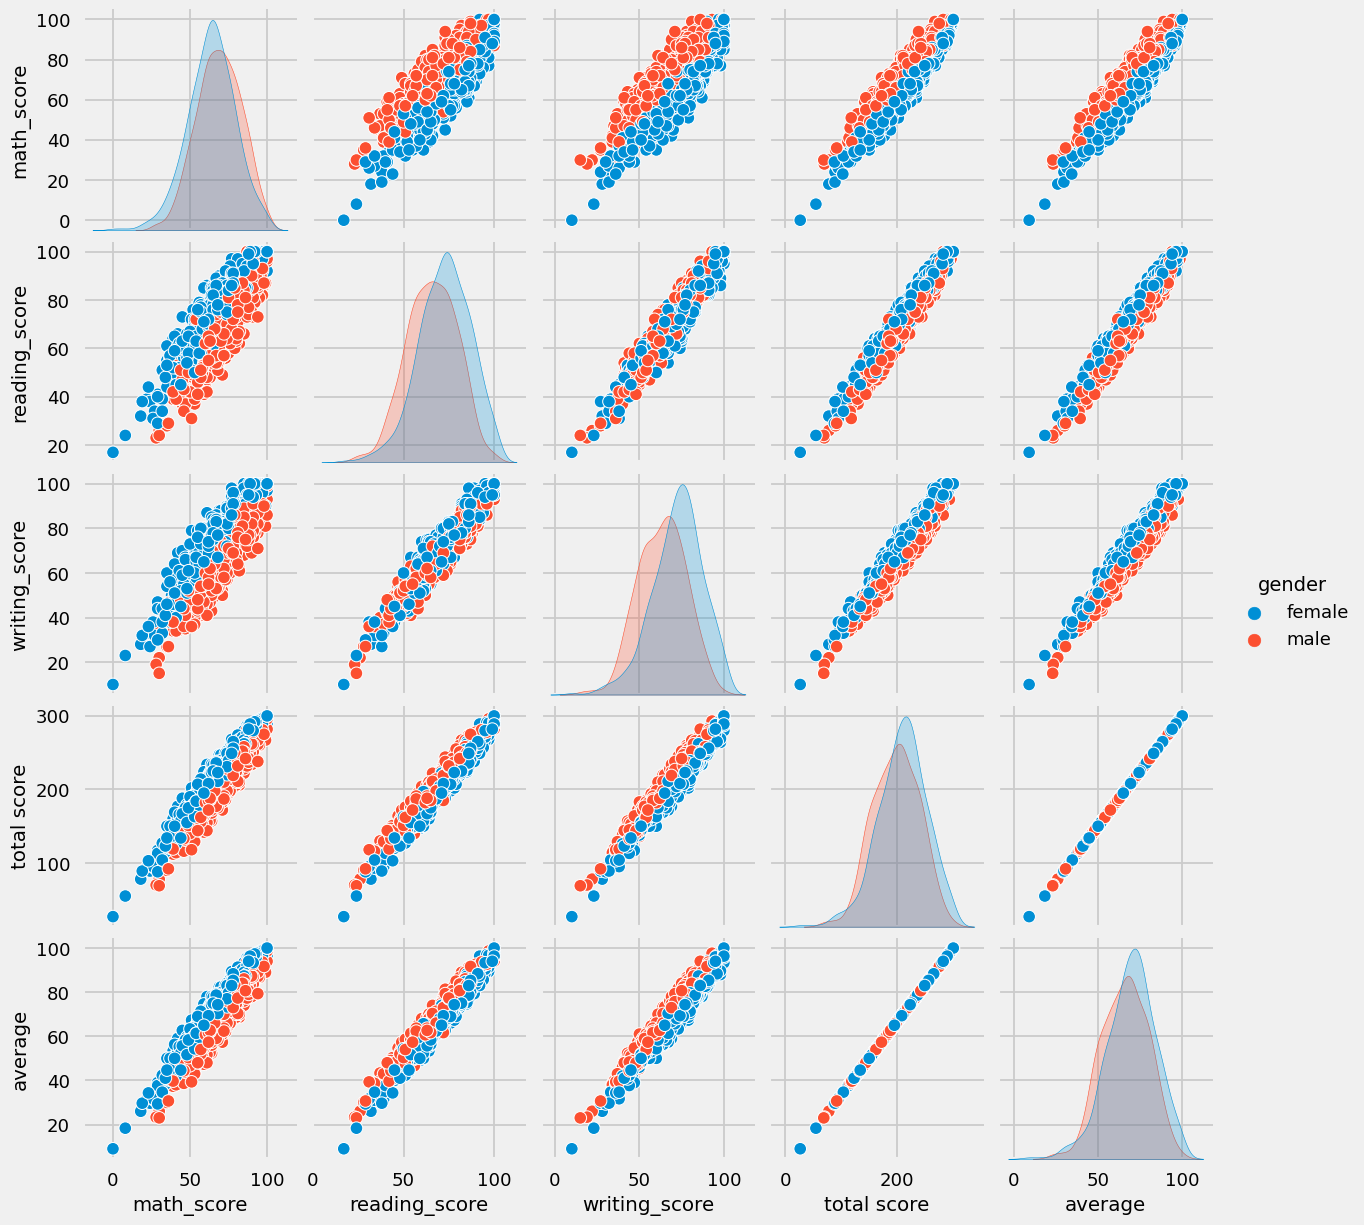

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

## INSIGHT
- FROM THE ABOVE PLOT IT IS CLEAR THAT ALL THE SCORES INCREASE LINEARLY WITH EACH OTHER.

## Conclusion

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.